In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import warnings
warnings.filterwarnings('ignore', message='missing ScriptRunContext', category=UserWarning)

# Data Wrangling

## Data Gathering

In [2]:
customers = pd.read_csv("customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation = pd.read_csv("geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv("order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments = pd.read_csv("order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews = pd.read_csv("order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders = pd.read_csv("orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_translation = pd.read_csv("product_category_name_translation.csv")
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products = pd.read_csv("products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv("sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### INSIGHT GATHERING DATA

## Assessing Data

### Menilai tabel 'customers'

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print("Jumlah duplikasi: ",customers.duplicated().sum())
customers.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai tabel 'geolocation'

In [13]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
print("Jumlah duplikasi: ",geolocation.duplicated().sum()) # Hapus data yang terdapat duplikasi
geolocation.describe()
# 'geolocation_lat' must be in -90 until 90
# 'geolocation_lng' nust be in -180 until 180, and harus bernilai negatig , karena Brazil berada di belahan barat (western hemisphere)

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Menilai tabel 'order_items'

In [15]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
print("Jumlah duplikasi: ",order_items.duplicated().sum()) # Hapus data yang terdapat duplikasi
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai tabel 'order_payments'

In [17]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
print("Jumlah duplikasi: ",order_payments.duplicated().sum()) # Hapus data yang terdapat duplikasi
order_payments.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai tabel 'order_reviews'

In [19]:
order_reviews.info() #Terdapat Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())
order_reviews.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menilai tabel 'orders'

In [22]:
orders.info() #Terdapat Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [24]:
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai tabel 'product_category_translation'

In [25]:
product_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [26]:
print("Jumlah duplikasi: ", product_category_translation.duplicated().sum())
product_category_translation.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Menilai tabel 'products'

In [27]:
products.info() #Terdapat Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
print("Jumlah duplikasi: ", products.duplicated().sum())
products.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai tabel 'sellers'

In [30]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())
sellers.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### INSIGHT ASSESSING DATA

## Cleaning Data

### Menghilangkan Duplicate Data

#### Table 'geolocation'

In [32]:
# Cleaning Duplicate Data on 'geolocation'
geolocation.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation.duplicated().sum())

Jumlah duplikasi:  0


### Handle Missing Values

#### Table 'order_reviews'

In [33]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [34]:
# Isi kolom review_comment_message dengan placeholder
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No Title')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Comment')
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [35]:
# Periksa hasil
print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


#### Table 'orders'

In [36]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [37]:
# Mengonversi beberapa kolom ke tipe datetime
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Delete missing values on 'order_approved_at', because it only has 160 data
orders = orders.dropna(subset=['order_approved_at'])

# Mengisi order_delivered_carrier_date berdasarkan rata-rata durasi
carrier_duration = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).dt.total_seconds() / 3600
average_carrier_duration = carrier_duration.mean()
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'] + pd.to_timedelta(average_carrier_duration, unit='h'))

# Mengisi order_delivered_customer_date berdasarkan rata-rata durasi
customer_duration = (orders['order_delivered_customer_date'] - orders['order_approved_at']).dt.total_seconds() / 3600
average_customer_duration = customer_duration.mean()
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_approved_at'] + pd.to_timedelta(average_customer_duration, unit='h'))

# Periksa hasil
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99281 non-null  datetime64[ns]
 6   order_delivered_customer_date  99281 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.8+ MB
None


In [38]:
orders[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().sum()

order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64

#### Table 'products'

In [39]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [40]:
# Mengisi product_category_name dengan 'unknown'
products['product_category_name'] = products['product_category_name'].fillna('unknown')

# Mengisi kolom numerik lainnya dengan nilai median
numerical_columns = [
    'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm'
]

for col in numerical_columns:
    products[col] = products[col].fillna(products[col].median())

# Verifikasi hasil
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [41]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Handle Inaccurate Data

#### Table 'customers'

In [42]:
# Because Brazil has five official numbers in the zip code
customers[customers.customer_zip_code_prefix == customers.customer_zip_code_prefix.min()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23914,7ae2a9337aa4bc799723511faa1d6830,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,sao paulo,SP


In [43]:
# Change data type into string
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(str)

# Change 'zip code = 1003' into '01003'
customers['customer_zip_code_prefix'].replace(customers['customer_zip_code_prefix'].min(), '01003')
customers[customers.customer_zip_code_prefix == customers.customer_zip_code_prefix.min()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23914,7ae2a9337aa4bc799723511faa1d6830,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,sao paulo,SP


#### Table 'geolocation'

In [44]:
# Filter nilai latitude dan longitude di luar rentang yang valid
# 'geolocation_lat' must be in -90 until 90

invalid_lat_lng = geolocation[
    (geolocation['geolocation_lat'] < -90) | (geolocation['geolocation_lat'] > 90) |
    (geolocation['geolocation_lng'] < -180) | (geolocation['geolocation_lng'] > 180)
]

# Menampilkan data invalid
# Tidak ada invalid data
invalid_lat_lng

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [45]:
# 'geolocation_lng' nust be in -180 until 180, and harus bernilai negatif , karena Brazil berada di belahan barat (western hemisphere)
# Filter nilai longitude yang positif (kemungkinan tidak valid untuk Brasil)
positive_lng = geolocation[geolocation['geolocation_lng'] > 0]

# Menampilkan data dengan longitude positif
positive_lng

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
513754,28155,42.439286,13.820214,santa maria,RJ
727755,57319,45.065933,9.341528,pau d'arco,AL
965687,95130,14.585073,121.105394,santa lucia do piai,RS


In [46]:
# Menampilkan jumlah data sebelum penghapusan
print(f"Jumlah data sebelum menghapus longitude positif: {len(geolocation)}")

# Menghapus 'geolocation_lat' yang bernilai positif dari tabel asli
geolocation = geolocation[geolocation['geolocation_lng'] <= 0]

# Menampilkan jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus longitude positif: {len(geolocation)}")

Jumlah data sebelum menghapus longitude positif: 738332
Jumlah data setelah menghapus longitude positif: 738329


#### Table 'order_items'

In [47]:
# Mengubah tipe data 'shipping_limit_date' ke 'datetime'
# Mengonversi shipping_limit_date ke datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [48]:
# Nilai min 'price' terlalu rendah = 0.85 (range 'price' yang terlalu jauh dibandingkan yang lain) -> terlalu kecil untuk produk e-commerce
# Nilai max 'price' terlalu tinggi = 6735.00 (range 'price' yang terlalu jauh dibandingkan yang lain) -> pastikan harganya sesuai dengan produk yang dijual
# Filter nilai price yang terlalu rendah atau terlalu tinggi
extreme_price = order_items[(order_items['price'] < 5) | (order_items['price'] > 3000)]
extreme_price

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
532,0136390286be8a34efdc801ed150568f,1,1716ea399ed8ee62ba811e6f55180f45,6338ea67c41078a46ad99cc009654956,2017-07-20 12:35:15,3.49,16.79
533,0136390286be8a34efdc801ed150568f,2,1716ea399ed8ee62ba811e6f55180f45,6338ea67c41078a46ad99cc009654956,2017-07-20 12:35:15,3.49,16.79
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
7550,111e8cdb5890a7e3beae3e717737ca51,1,ba82e510acd9a0fe69a44cafea53f9aa,0e44d110fa6a54e121cb2c095a77762f,2017-11-08 12:30:27,4.20,11.85
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
108990,f7a94ed5a5cf7c0680e0d3271163bb3f,4,0d13a341a2916308175bc9e89bdafb73,334cab711dee080b079fa5779b584783,2018-07-03 01:31:03,4.90,12.79
108991,f7a94ed5a5cf7c0680e0d3271163bb3f,5,0d13a341a2916308175bc9e89bdafb73,334cab711dee080b079fa5779b584783,2018-07-03 01:31:03,4.90,12.79
109923,f9ccaff7267fd0cf076e795b1fae8b69,1,44d53f1240d6332232e4393c06500475,b64d51f0435e884e8de603b1655155ae,2018-08-14 14:04:44,3.00,15.23
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


In [49]:
# Nilai min 'freight_value' = 0.00. Tidak wajar karena pengiriman selalu memiliki biaya kecuali ada promo khusus atau datanya yang salah
# Nilai max 'freight_value' = 409.68. Nilai yang cukup tinggi untuk biaya pengiriman.
# Filter nilai freight_value yang nol atau sangat tinggi
extreme_freight = order_items[(order_items['freight_value'] == 0) | (order_items['freight_value'] > 100)]
extreme_freight

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.00
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.00
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.00
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
...,...,...,...,...,...,...,...
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.00
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
112359,ff3e501f56dcf0752578d86df833558f,1,608af629c5b520efe1caf06e1cfc4abc,5dceca129747e92ff8ef7a997dc4f8ca,2017-10-27 21:14:33,299.9,170.11
112472,ff96d596c25445650eee60b94fa62244,1,f7b30f48c235d715e00822023d8a4dce,7238a95bb63ef7e498389fb863b834a1,2018-05-04 13:50:07,329.0,127.55


In [50]:
# Menghapus baris 'inaccurate data' :
order_items = order_items[(order_items['price'] >= 5) & (order_items['price'] <= 3000)]
order_items = order_items[(order_items['freight_value'] > 0) & (order_items['freight_value'] <= 100)]
order_items.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,111468.000000,111468,111468.000000,111468.000000
mean,1.195697,2018-01-07 01:36:33.293303808,116.920159,19.316793
min,1.000000,2016-09-19 00:15:34,5.000000,0.010000
25%,1.000000,2017-09-20 11:00:55.249999872,39.900000,13.080000
50%,1.000000,2018-01-25 17:31:01,74.900000,16.250000
75%,1.000000,2018-05-10 11:10:34,132.085000,21.100000
max,21.000000,2020-04-09 22:35:08,2999.900000,99.970000
std,0.688396,NaN,163.691717,11.987553


#### Tabel 'order_payments'

In [51]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [52]:
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [53]:
# Menghapus 'not_defined', karena hanya memiliki 3 baris data yang tidak akan mempengaruhi anaslis.
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [54]:
order_payments['payment_type'] = order_payments['payment_type'].replace('not_defined', 'unknown')
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

In [55]:
# 'payment_installment' = jumlah cicilan pembayaran (harus dilakukan >=1 kali)
order_payments[order_payments['payment_installments'] <= 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [56]:
# Mengubah 'payment_installments' == 0 menjadi 1. Dikarenakan adanya kesalaha input
order_payments.loc[order_payments['payment_installments'] == 0, 'payment_installments'] = 1
# Verifikasi data setelah melakukan perubahan
order_payments[order_payments['payment_installments'] <= 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [57]:
# Verifikasi deskripsi setelah melakukan perubahan
order_payments['payment_installments'].describe()

count    103883.000000
mean          2.853422
std           2.687054
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [58]:
# Check 'payment_value' digunakan untuk mencatat pembayaran
# 'payment_value' == 0 dengan 'payment_type' == voucher, maka data 'payment_value' bukan merupakan data yang salah.
# Karena, customer menggunakan 'voucher penuh' untuk membayar produk yang mereka beli
order_payments[order_payments['payment_value'] <= 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


#### Tabel 'order_reviews'

In [59]:
# Mengubah datatype 'review_creation_date' dan 'review_answer_timestamp' menjadi 'datetime'
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [60]:
# Check urutan tanggal -> 'review_answer_timestamp' >= 'review_creation_date'
invalid_dates = order_reviews[order_reviews['review_answer_timestamp'] < order_reviews['review_creation_date']]
invalid_dates

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [61]:
# Check komentar yang kosong
no_comment_reviews = order_reviews[
    order_reviews['review_comment_message'].isnull() & 
    order_reviews['review_comment_title'].isnull()
]
no_comment_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


#### Tabel 'orders'

In [62]:
# Konversi kolom waktu ke datetime
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99281 non-null  datetime64[ns]
 6   order_delivered_customer_date  99281 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [63]:
# Periksa urutan waktu yang tidak logis
invalid_time_orders = orders[
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
]

# Hitung jumlah data anomali
jumlah_anomali = invalid_time_orders.shape[0]
print(f"Jumlah data yang mengalami anomali waktu: {jumlah_anomali}")

Jumlah data yang mengalami anomali waktu: 9468


In [64]:
# Menambahkan kolom baru 'is_time_anomaly' untuk menandai data yang termasuk kedalam anomali waktu.
orders['is_time_anomaly'] = (
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
)

orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,False
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,False
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,False
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,False
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,False


In [65]:
# Perbaiki data anomali
orders.loc[orders['order_approved_at'] < orders['order_purchase_timestamp'], 'order_approved_at'] = orders['order_purchase_timestamp']
orders.loc[orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'], 'order_estimated_delivery_date'] = orders['order_delivered_customer_date'] + pd.Timedelta(days=5)

In [66]:
# Perbaiki kolom 'is_time_anomaly'
orders['is_time_anomaly'] = (
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
)

# Cek jumlah data anomali yang tersisa
remaining_anomalies = orders[orders['is_time_anomaly']]
print(f"Jumlah data anomali setelah perbaikan: {len(remaining_anomalies)}")

Jumlah data anomali setelah perbaikan: 1423


In [67]:
# Kelompokkan anomali berdasarkan jenis
anomaly_types = {
    'approved_before_purchase': orders['order_approved_at'] < orders['order_purchase_timestamp'],
    'delivered_before_approved': orders['order_delivered_carrier_date'] < orders['order_approved_at'],
    'customer_received_before_delivered': orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date'],
    'estimated_before_delivered': orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date']
}

# Hitung jumlah tiap jenis anomali
for anomaly, condition in anomaly_types.items():
    print(f"{anomaly}: {condition.sum()} anomali")

approved_before_purchase: 0 anomali
delivered_before_approved: 1359 anomali
customer_received_before_delivered: 64 anomali
estimated_before_delivered: 0 anomali


In [68]:
# Perbaiki order_delivered_carrier_date yang salah
# menetapkan tanggal pengiriman carrier menjadi setidaknya sehari setelah persetujuan pesanan
orders.loc[orders['order_delivered_carrier_date'] < orders['order_approved_at'], 'order_delivered_carrier_date'] = orders['order_approved_at'] + pd.Timedelta(days=1)

# Perbaiki order_delivered_customer_date yang salah
# tanggal pelanggan menerima pesanan harus diperbaiki menjadi setidaknya sehari setelah pengiriman kurir
orders.loc[orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date'], 'order_delivered_customer_date'] = orders['order_delivered_carrier_date'] + pd.Timedelta(days=1)

In [69]:
# Periksa ulang anomali yang tersisa
# Perbarui kolom 'is_time_anomaly'
orders['is_time_anomaly'] = (
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
)

# Kelompokkan anomali berdasarkan jenis
anomaly_types = {
    'approved_before_purchase': orders['order_approved_at'] < orders['order_purchase_timestamp'],
    'delivered_before_approved': orders['order_delivered_carrier_date'] < orders['order_approved_at'],
    'customer_received_before_delivered': orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date'],
    'estimated_before_delivered': orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date']
}

# Hitung jumlah tiap jenis anomali dan tampilkan
total_anomalies = 0
print("Jumlah anomali berdasarkan tipe:")
for anomaly, condition in anomaly_types.items():
    count = condition.sum()
    total_anomalies += count
    print(f"{anomaly}: {count} anomali")

# Tampilkan jumlah total anomali
print(f"\nJumlah total data anomali: {total_anomalies}")

Jumlah anomali berdasarkan tipe:
approved_before_purchase: 0 anomali
delivered_before_approved: 0 anomali
customer_received_before_delivered: 0 anomali
estimated_before_delivered: 17 anomali

Jumlah total data anomali: 17


In [70]:
# Menghapus sisa data anomali oada 'estimated_before_delivered' (karena, jumlah datanya sangat kecil dan tidak mempengaruhi proses analisis)
# Menghapus data anomali
clean_orders = orders[~orders['is_time_anomaly']]
print(f"Jumlah data bersih setelah penghapusan: {len(clean_orders)}")

Jumlah data bersih setelah penghapusan: 99264


#### Tabel 'products'

In [71]:
# Mengubah tipe data 'float' ke 'int' -> karena isi data dari kolom-kolom dibawah ini seharusnya berupa angka bulat
products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']] = products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].astype('int')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  int32  
 3   product_description_lenght  32951 non-null  int32  
 4   product_photos_qty          32951 non-null  int32  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.9+ MB


In [72]:
# Terdapat nilai yang tidak wajar pada kolom 'product_weight_g' yaitu bernilai 0 -> tidak wajar jika berat produk hanya 0.0 (alias tidak ada massa)
# Check 'product_weight_g' yang bernilai 0
# Ditemukan empat data dengan berat produk = 0 dalam kategori 'cama_mesa_banho' atau bed_bath_table
products_with_zero_weight = products[products['product_weight_g'] == 0]
products_with_zero_weight

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51,529,1,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48,528,1,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53,528,1,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53,528,1,0.0,30.0,25.0,30.0


In [73]:
# Hitung median berat untuk kategori 'cama_mesa_banho', kecuali nilai 0
median_weight = products[(products['product_category_name'] == 'cama_mesa_banho') & (products['product_weight_g'] > 0)]['product_weight_g'].median()

# Ganti nilai 0 dengan median
products.loc[products['product_weight_g'] == 0, 'product_weight_g'] = median_weight

# Konfirmasi hasil
# Tidak ada lagi berat produk = 0
products[products['product_category_name'] == 'cama_mesa_banho'][['product_id', 'product_weight_g']].head()

,product_id,product_weight_g
10,14aa47b7fe5c25522b47b4b29c98dcb9,1100.0
19,f53103a77d9cf245e579ea37e5ec51f0,500.0
21,518ef5de2c2b3a255e326a4594ba15d9,800.0
30,47859fca9dd7485cbd93c3e8993bb74f,650.0
42,db46052aed7dff59ba38cf2fe29b87f9,6350.0


In [74]:
# Analisis deskriptif ulang untuk kolom 'product_weight_g'
products['product_weight_g'].describe()

count    32951.000000
mean      2276.528542
std       4281.867862
min          2.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [75]:
# Produk dengan berat sangat kecil
light_products = products[products['product_weight_g'] < 10]
print(f"Jumlah produk dengan berat sangat kecil (<10g): {len(light_products)}")
light_products[['product_id', 'product_category_name', 'product_weight_g']]

Jumlah produk dengan berat sangat kecil (<10g): 5


,product_id,product_category_name,product_weight_g
9396,ad7d07f5775feab3f20504d1ad3fff11,moveis_decoracao,2.0
13397,7ddb76f2c7237acc852358b95e7946a8,papelaria,2.0
15374,f9fafac43d3416d92ecc303fdeb1743d,moveis_decoracao,2.0
15675,8aae4df46baf1278422b69edbb50bd35,moveis_decoracao,2.0
16181,5837bba0ce6e35e6f2dc5c3e223e3276,moveis_decoracao,2.0


In [76]:
# Simpan data sebelum perbaikan
light_products_before = products[(products['product_category_name'].isin(['moveis_decoracao', 'papelaria'])) & (products['product_weight_g'] < 10)]

# Median berat untuk kategori 'moveis_decoracao' dan 'papelaria'
median_moveis = products[(products['product_category_name'] == 'moveis_decoracao') & (products['product_weight_g'] > 10)]['product_weight_g'].median()
median_papelaria = products[(products['product_category_name'] == 'papelaria') & (products['product_weight_g'] > 10)]['product_weight_g'].median()

# Perbaikan data
products.loc[(products['product_category_name'] == 'moveis_decoracao') & (products['product_weight_g'] < 10), 'product_weight_g'] = median_moveis
products.loc[(products['product_category_name'] == 'papelaria') & (products['product_weight_g'] < 10), 'product_weight_g'] = median_papelaria

# Simpan data setelah perbaikan
light_products_after = products.loc[light_products_before.index]

# Cetak perbaikan
print("Detail Perbaikan Data Produk Kecil (<10g):")
light_products_before[['product_id', 'product_category_name', 'product_weight_g']].merge(light_products_after[['product_id', 'product_weight_g']], on='product_id', suffixes=('_before', '_after'))

Detail Perbaikan Data Produk Kecil (<10g):


,product_id,product_category_name,product_weight_g_before,product_weight_g_after
0,ad7d07f5775feab3f20504d1ad3fff11,moveis_decoracao,2.0,1200.0
1,7ddb76f2c7237acc852358b95e7946a8,papelaria,2.0,650.0
2,f9fafac43d3416d92ecc303fdeb1743d,moveis_decoracao,2.0,1200.0
3,8aae4df46baf1278422b69edbb50bd35,moveis_decoracao,2.0,1200.0
4,5837bba0ce6e35e6f2dc5c3e223e3276,moveis_decoracao,2.0,1200.0


In [77]:
# Recheck anomali pada berat data yang <10g
remaining_light_products = products[products['product_weight_g'] < 10]
print(f"Jumlah produk dengan berat sangat kecil (<10g) setelah perbaikan: {len(remaining_light_products)}")

Jumlah produk dengan berat sangat kecil (<10g) setelah perbaikan: 0


In [78]:
# Produk dengan berat sangat besar
heavy_products = products[products['product_weight_g'] > 20000]
print(f"Jumlah produk dengan berat sangat besar (>20kg): {len(heavy_products)}")
heavy_products[['product_id', 'product_category_name', 'product_weight_g']]

Jumlah produk dengan berat sangat besar (>20kg): 485


,product_id,product_category_name,product_weight_g
148,8d6cb00151d423c52855385c89f0bae8,automotivo,27100.0
293,f777c903946dd86fd00cd5b32ec3e907,construcao_ferramentas_construcao,21400.0
344,d0877f0094337c414d23f5a3c7bad20c,moveis_escritorio,30000.0
504,6b82874c6b51b92913dcdb364eaaae0f,unknown,21450.0
509,53f92b0474f91fcb5bd188c6a8075c38,utilidades_domesticas,30000.0
...,...,...,...
32267,af6212485a18d445fe0fda7c7875d4b3,cama_mesa_banho,20400.0
32403,b1370e983f7a817244be390d1f7f2e7b,eletrodomesticos_2,22600.0
32416,4c973b1f6f4357bcdcd7598abe7912bc,utilidades_domesticas,23950.0
32491,2b752ed328ea866e4721ca4e236a416c,moveis_cozinha_area_de_servico_jantar_e_jardim,30000.0


In [79]:
# Produk dengan berat sangat besar
heavy_products = products[products['product_weight_g'] > 20000]

# Median berat untuk setiap kategori
category_median = products.groupby('product_category_name')['product_weight_g'].median()

# Produk dengan berat besar yang terlihat mencurigakan
heavy_suspicious = heavy_products[heavy_products['product_weight_g'] > category_median[heavy_products['product_category_name']].values]

# Simpan data sebelum perbaikan
heavy_products_before = heavy_products[heavy_products['product_weight_g'] > 20000]

# Perbaikan data mencurigakan (di dalam loop per kategori)
for category in heavy_suspicious['product_category_name'].unique():
    median_weight = category_median[category]
    products.loc[(products['product_category_name'] == category) & (products['product_weight_g'] > 20000),'product_weight_g'] = median_weight

# Simpan data setelah perbaikan
heavy_products_after = products.loc[heavy_products_before.index]

# Gabungkan data sebelum dan setelah perbaikan
merged_data = heavy_products_before[['product_id', 'product_category_name', 'product_weight_g']].merge(
    heavy_products_after[['product_id', 'product_weight_g']], 
    on='product_id', 
    suffixes=('_before', '_after')
)

# Cetak perbaikan
print("Detail Perbaikan Data Produk Berat (>20kg):")
merged_data

Detail Perbaikan Data Produk Berat (>20kg):


,product_id,product_category_name,product_weight_g_before,product_weight_g_after
0,8d6cb00151d423c52855385c89f0bae8,automotivo,27100.0,900.0
1,f777c903946dd86fd00cd5b32ec3e907,construcao_ferramentas_construcao,21400.0,1450.0
2,d0877f0094337c414d23f5a3c7bad20c,moveis_escritorio,30000.0,11600.0
3,6b82874c6b51b92913dcdb364eaaae0f,unknown,21450.0,700.0
4,53f92b0474f91fcb5bd188c6a8075c38,utilidades_domesticas,30000.0,1050.0
...,...,...,...,...
480,af6212485a18d445fe0fda7c7875d4b3,cama_mesa_banho,20400.0,1250.0
481,b1370e983f7a817244be390d1f7f2e7b,eletrodomesticos_2,22600.0,9050.0
482,4c973b1f6f4357bcdcd7598abe7912bc,utilidades_domesticas,23950.0,1050.0
483,2b752ed328ea866e4721ca4e236a416c,moveis_cozinha_area_de_servico_jantar_e_jardim,30000.0,9950.0


In [80]:
# Recheck anomali pada berat data yang >20kg
remaining_heavy_products = products[products['product_weight_g'] > 20000]
print(f"Jumlah produk dengan berat sangat besar (>2000g) setelah perbaikan: {len(remaining_heavy_products)}")

Jumlah produk dengan berat sangat besar (>2000g) setelah perbaikan: 0


In [81]:
# Recheck distribusi data, khususnya pada bagian 'min' dan 'max'
category_stats = products.groupby('product_category_name')['product_weight_g'].describe()
category_stats

,count,mean,std,min,25%,50%,75%,max
product_category_name,,,,,,,,
agro_industria_e_comercio,74.0,4632.500000,4743.549538,50.0,687.5,2672.25,7025.0,16700.0
alimentos,82.0,923.414634,1222.642079,75.0,262.5,541.50,1133.5,8238.0
alimentos_bebidas,104.0,1307.932692,2011.971927,50.0,300.0,600.00,1250.0,10800.0
artes,55.0,1691.763636,2551.614333,100.0,350.0,700.00,1700.0,15400.0
artes_e_artesanato,19.0,1164.578947,1599.096978,100.0,258.5,500.00,1225.0,6850.0
...,...,...,...,...,...,...,...,...
tablets_impressao_imagem,9.0,381.444444,303.745416,100.0,200.0,300.00,450.0,1100.0
telefonia,1134.0,236.506173,335.883175,50.0,100.0,200.00,300.0,8100.0
telefonia_fixa,116.0,660.827586,811.213897,50.0,150.0,414.50,813.5,6050.0


#### Tabel 'sellers'

In [82]:
# Mengubah tipe data 'int' menjadi 'str' pada kolom 'seller_zip_code_prefix'
# Karena kode pos bisa terdiri dari angka dengan awalan 0 yang tidak boleh dihilangkan
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].astype(str)
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [83]:
sellers.describe()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,3442f8959a84dea7ee197c632cb2df15,14940,sao paulo,SP
freq,1,49,694,1849


### INSIGHT

1. Data geolocation telah diperbaiki untuk memastikan validitas dan akurasi posisi geografis.
2. Data ulasan dipastikan relevan dan hanya mencakup ulasan yang memiliki komentar lengkap.
3. Proses pemesanan menjadi lebih bersih dan dapat dipercaya untuk analisis durasi pengiriman dan waktu estimasi.
4. Data produk disiapkan untuk analisis berdasarkan kategori, berat, dan dimensi produk.
5. Data item pesanan difokuskan pada nilai transaksi yang realistis untuk penghitungan margin dan analisis biaya pengiriman.
6. Pembayaran pada pesanan disesuaikan agar representasi data lebih akurat, termasuk alokasi voucher.
7. Data pelanggan disesuaikan untuk representasi kode pos yang valid.

KESIMPULAN :
Proses cleaning ini meningkatkan keandalan, akurasi, dan kelengkapan data, memungkinkan analisis lebih mendalam tentang:
- Pola pembelian berdasarkan waktu dan lokasi.
- Keefektifan pengiriman dan kepuasan pelanggan.
- Performa produk dan dampak kategori produk terhadap penjualan.

### Explaratory Data Analysis

#### Menentukan Pertanyaan Bisnis

#### Explore tabel 'customers'

In [84]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
91398,44f5f5476eb92ebc9c4ab70c8b1bf189,bcec9b9aa5e994638f1eb6c2e5f449aa,60850,fortaleza,CE
37881,9b04f358b1024f10a9489dff2cb26314,8314fd3b9d65ff21314a9b6bf7d12750,9250,santo andre,SP
10311,e0afe6aecb9f6406541ff71b13fd9aa9,45eaea613902ad53c34346788bea6cf7,4726,sao paulo,SP
7907,4597ba56e38fdc23858e2a8e6de4fa21,29e84f0137ebeb665d3982dbbe5d22e4,11714,praia grande,SP
18816,91835f885bfb14dfde8979136407fc85,c2bf9a98bc1ac4defbebaa21c71dd3c6,24210,niteroi,RJ


In [85]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [86]:
# Pivot Table 1: Distribusi Pelanggan Berdasarkan Kota dan Negara Bagian
pivot_city_state = customers.groupby(['customer_state', 'customer_city'])['customer_unique_id'].nunique().reset_index()
pivot_city_state = pivot_city_state.rename(columns={'customer_unique_id': 'number_of_customers'})
pivot_city_state_sorted = pivot_city_state.sort_values(by=['customer_state', 'number_of_customers'], ascending=[True, False])

# Menampilkan hasil
print("Pivot Table 1: Distribusi Pelanggan Berdasarkan Kota dan Negara Bagian")
pivot_city_state_sorted.head()

Pivot Table 1: Distribusi Pelanggan Berdasarkan Kota dan Negara Bagian


,customer_state,customer_city,number_of_customers
5,AC,rio branco,66
1,AC,cruzeiro do sul,3
6,AC,senador guiomard,2
7,AC,xapuri,2
0,AC,brasileia,1


In [87]:
# Pivot Table 2: Frekuensi Transaksi oleh Pelanggan
customer_transactions = customers.groupby('customer_unique_id')['customer_id'].count().reset_index()
customer_transactions = customer_transactions.rename(columns={'customer_id': 'transaction_count'})
pivot_transactions = customer_transactions.groupby('transaction_count')['customer_unique_id'].count().reset_index()
pivot_transactions = pivot_transactions.rename(columns={'customer_unique_id': 'number_of_customers'})

# Menampilkan hasil
print("\nPivot Table 2: Frekuensi Transaksi oleh Pelanggan")
pivot_transactions.head()


Pivot Table 2: Frekuensi Transaksi oleh Pelanggan


,transaction_count,number_of_customers
0,1,93099
1,2,2745
2,3,203
3,4,30
4,5,8


In [88]:
# Pivot Table 3: Variasi Kode Pos
pivot_zip_state = customers.groupby('customer_state')['customer_zip_code_prefix'].nunique().reset_index()
pivot_zip_state = pivot_zip_state.rename(columns={'customer_zip_code_prefix': 'unique_zip_codes'})

# Menampilkan hasil
print("\nPivot Table 3: Variasi Kode Pos")
pivot_zip_state.head()


Pivot Table 3: Variasi Kode Pos


,customer_state,unique_zip_codes
0,AC,20
1,AL,126
2,AM,55
3,AP,18
4,BA,735


#### Explore tabel 'geolocation'

In [89]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
377081,17900,-21.501283,-51.534944,dracena,SP
577003,32649,-19.983963,-44.197784,betim,MG
881795,85960,-24.550769,-54.062206,marechal candido rondon,PR
810804,76330,-15.756902,-49.320793,jaragua,GO
932355,89500,-26.785035,-51.012680,cacador,SC


In [90]:
geolocation.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738329.000000,738329.000000,738329.000000,738329,738329
unique,NaN,NaN,NaN,8010,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38315.997875,-20.998577,-46.461483,NaN,NaN
std,30632.477283,5.891217,4.388343,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603063,-48.867850,NaN,NaN
50%,29144.000000,-22.873594,-46.647281,NaN,NaN
75%,65950.000000,-19.923344,-43.836996,NaN,NaN


In [91]:
# Aggregate jumlah geolokasi dan kota unik per negara bagian (provinsi)
geolocation_by_state = geolocation.groupby('geolocation_state').agg(
    total_geolocations=('geolocation_zip_code_prefix', 'count'),
    unique_cities=('geolocation_city', 'nunique')
).reset_index()

print("Jumlah geolokasi per negara bagian:")
geolocation_by_state

Jumlah geolokasi per negara bagian:


,geolocation_state,total_geolocations,unique_cities
0,AC,1039,34
1,AL,3414,129
2,AM,1986,74
3,AP,738,17
4,BA,27720,652
5,CE,9541,260
6,DF,9080,28
7,ES,12632,160
8,GO,15601,384
9,MA,6277,299


In [92]:
# Statistik latitude dan longitude per negara bagian (provinsi)
lat_lng_stats = geolocation.groupby('geolocation_state').agg(
    avg_lat=('geolocation_lat', 'mean'),
    avg_lng=('geolocation_lng', 'mean'),
    min_lat=('geolocation_lat', 'min'),
    max_lat=('geolocation_lat', 'max'),
    min_lng=('geolocation_lng', 'min'),
    max_lng=('geolocation_lng', 'max')
).reset_index()

print("Statistik latitude dan longitude per negara bagian:")
lat_lng_stats

Statistik latitude dan longitude per negara bagian:


,geolocation_state,avg_lat,avg_lng,min_lat,max_lat,min_lng,max_lng
0,AC,-9.709319,-68.453261,-23.578707,-7.591290,-72.930746,-43.352613
1,AL,-9.608383,-36.080889,-29.800343,-8.840265,-51.870929,-35.178280
2,AM,-3.346562,-60.535697,-9.166197,0.537738,-72.585795,-56.714206
3,AP,0.073767,-51.204454,-26.405093,3.849093,-53.045751,-50.791373
4,BA,-13.062407,-39.627164,-34.622400,38.991963,-58.901888,-4.947823
5,CE,-4.395199,-39.028335,-22.551255,-2.793588,-56.053477,-34.835134
6,DF,-15.814327,-47.979684,-16.047095,-11.000345,-68.752185,-46.428287
7,ES,-20.078083,-40.516053,-21.823092,29.409252,-101.466766,-35.340424
8,GO,-16.567440,-49.344447,-21.467829,-12.993015,-56.171869,-46.106244
9,MA,-3.821203,-44.818273,-9.479397,-1.197891,-48.435954,-41.897421


In [93]:
# Filter data untuk kota São Paulo dan aggregate
sp_geolocation = geolocation[geolocation['geolocation_city'] == 'sao paulo'].groupby('geolocation_zip_code_prefix').agg(
    total_entries=('geolocation_zip_code_prefix', 'count')
).reset_index()

print("Jumlah geolokasi per kode pos di kota São Paulo:")
sp_geolocation

Jumlah geolokasi per kode pos di kota São Paulo:


,geolocation_zip_code_prefix,total_entries
0,1001,8
1,1002,5
2,1003,10
3,1004,13
4,1005,11
...,...,...
3166,8474,30
3167,8475,37
3168,8485,74
3169,8490,79


#### Explore tabel 'order_items'

In [94]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
103504,eb14dbf3c8f946973fe58a78a8b67942,1,108fc05afc7b739e4a355e2bfa12bdc2,99002261c568a84cce14d43fcffb43ea,2018-05-08 19:31:20,140.00,29.02
98360,df13cbaf3230c62a4b582317936e8a39,7,279d5c3589fceee2a1c236fbe5287975,0725b8c0f3f906e58f70cbe76b7c748c,2018-07-11 11:45:37,6.12,11.13
64079,925f43c2d4991e4360c5a7435c5431a3,1,ab616e3e77440ec426347964a3489108,9add47bf45ce8e8c7db6b9cf670b1e09,2017-04-05 22:50:19,65.90,21.93
13633,1f040a56df747205ee9e9a9cd8003877,1,571f10e82bf565790b3fa563cbd6b716,6edacfd9f9074789dad6d62ba7950b9c,2017-05-22 03:35:31,24.90,14.10
107448,f4293a053b040f6515c5b48808a282be,1,c9d1849f97b6fe404378805a105d64ec,7722b1df1b0e383e000397b2c11e3e19,2017-12-04 20:56:58,89.90,15.39


In [95]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,111468,111468.000000,111468,111468,111468,111468.000000,111468.000000
unique,97663,NaN,32629,3072,NaN,NaN,NaN
top,1b15974a0141d54e36626dca3fdc731a,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,20,NaN,488,2033,NaN,NaN,NaN
mean,NaN,1.195697,NaN,NaN,2018-01-07 01:36:33.293303808,116.920159,19.316793
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,5.000000,0.010000
25%,NaN,1.000000,NaN,NaN,2017-09-20 11:00:55.249999872,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-25 17:31:01,74.900000,16.250000
75%,NaN,1.000000,NaN,NaN,2018-05-10 11:10:34,132.085000,21.100000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,2999.900000,99.970000


In [96]:
# Mengelompokkan berdasarkan seller_id untuk mendapatkan total harga dan rata-rata biaya pengiriman
agg_seller = order_items.groupby('seller_id').agg(
    total_price=('price', 'sum'),
    average_freight_value=('freight_value', 'mean'),
    transaction_count=('order_item_id', 'count')
).reset_index()

# Menampilkan hasil
agg_seller.head()

,seller_id,total_price,average_freight_value,transaction_count
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,21.020000,3
1,001cca7ae9ae17fb1caed9dfb1094831,24911.03,36.720672,238
2,001e6ad469a905060d959994f1b41e4f,250.00,17.940000,1
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,14.430182,55
4,003554e2dce176b5555353e4f3555ac8,120.00,19.380000,1


In [97]:
# Mengelompokkan berdasarkan product_id untuk melihat rata-rata harga dan biaya pengiriman
agg_product = order_items.groupby('product_id').agg(
    average_price=('price', 'mean'),
    average_freight_value=('freight_value', 'mean'),
    transaction_count=('order_item_id', 'count')
).reset_index()

# Menampilkan hasil
agg_product.head()

,product_id,average_price,average_freight_value,transaction_count
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,1
1,00088930e925c41fd95ebfe695fd2655,129.90,13.93,1
2,0009406fd7479715e4bef61dd91f2462,229.00,13.10,1
3,000b8f95fcb9e0096488278317764d19,58.90,19.60,2
4,000d9be29b5207b54e86aa1b1ac54872,199.00,19.27,1


In [98]:
# Menghitung total nilai transaksi per order item
order_items['total_value'] = order_items['price']

# Menggabungkan dengan data order untuk mendapatkan total nilai transaksi per customer
customer_ltv = order_items.merge(orders[['order_id', 'customer_id']], on='order_id', how='inner').groupby('customer_id')['total_value'].sum().reset_index()

# Menampilkan hasil LTV
customer_ltv.head()

,customer_id,total_value
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


#### Explore tabel 'order_payments'

In [99]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
86262,6a7a2caec1c515a203d22bfdd390da63,1,credit_card,1,92.89
7423,08320dbc54cab8156a9a9f7c74a8b078,1,credit_card,1,154.20
30536,4c64f4f7a59f7092060cce91b033d7a9,1,boleto,1,382.74
3005,30ff43d8703d375269c1675af737bda7,1,credit_card,1,95.98
10039,084080266521db39cd371403f8534271,1,credit_card,6,108.59


In [100]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103883,103883.000000,103883,103883.000000,103883.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092681,NaN,2.853422,154.104831
std,NaN,0.706594,NaN,2.687054,217.495628
min,NaN,1.000000,NaN,1.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.800000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


In [101]:
# Mengelompokkan data berdasarkan payment_type untuk melihat total pembayaran dan rata-rata pembayaran
agg_payment_type = order_payments.groupby('payment_type').agg(
    total_payment_value=('payment_value', 'sum'),
    average_payment_value=('payment_value', 'mean'),
    transaction_count=('payment_sequential', 'count')
).reset_index()

# Menampilkan hasil
agg_payment_type.head()

,payment_type,total_payment_value,average_payment_value,transaction_count
0,boleto,2869361.27,145.034435,19784
1,credit_card,12542084.19,163.319021,76795
2,debit_card,217989.79,142.570170,1529
3,voucher,379436.87,65.703354,5775


In [102]:
# Mengelompokkan data berdasarkan payment_installments untuk melihat rata-rata pembayaran per cicilan
agg_payment_installments = order_payments.groupby('payment_installments').agg(
    average_payment_value=('payment_value', 'mean'),
    transaction_count=('payment_sequential', 'count')
).reset_index()

agg_payment_installments.head()

,payment_installments,average_payment_value,transaction_count
0,1,112.425959,52545
1,2,127.228150,12413
2,3,142.539317,10461
3,4,163.976840,7098
4,5,183.465222,5239


#### Explore tabel 'order_reviews'

In [103]:
order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
12968,4de6d124664acfb56fb8715533225766,d18c62967c0e60ea439822111331f6ec,4,No Title,Gostei muito do kit... agora é experimentar.,2017-12-21,2017-12-22 01:01:51
82181,761754f0b80840915a8c95318db1c760,919c91917a79609e73d44e1b01df6bd8,4,No Title,Bem foi presente e a pessoa gostou.,2017-09-23,2017-09-23 19:47:17
49991,bef608e675b53d6166bdbc36546738d0,f296152f7123f2d4455e82df8835f5a2,5,No Title,Otimo!,2018-08-29,2018-09-01 18:48:35
31393,91f1bd15566ed8690e19600723cac209,dc1b86dca769213b0db63c4922bd6a73,5,No Title,No Comment,2017-07-25,2017-07-26 20:50:36
64245,dbeeb352915c1807535bc09831ec056d,87daab525d42b65a8fd0083f652cc9d9,5,No Title,No Comment,2018-03-08,2018-03-08 16:32:33


In [104]:
order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [105]:
# Mengelompokkan data berdasarkan review_score untuk melihat jumlah ulasan dan rata-rata skor
agg_review_score = order_reviews.groupby('review_score').agg(
    review_count=('review_id', 'count')
).reset_index()

# Menampilkan hasil
agg_review_score.head()

,review_score,review_count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [106]:
# Mengelompokkan data berdasarkan order_id untuk melihat jumlah ulasan per pesanan
agg_order_reviews = order_reviews.groupby('order_id').agg(
    review_count=('review_id', 'count')
).reset_index()

# Menampilkan hasil
# Jumlah ulasan per pesanan minimal satu ulasan
# Jumlah ulasan per pesanan maximal tiga ulasan
agg_order_reviews.describe()

,review_count
count,98673.000000
mean,1.005584
std,0.075060
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


#### Explore tabel 'orders'

In [107]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly
33428,34fa15662de2057126fbb0b0f1c1120f,d79f039ffbcb11e3ffe7410595788f03,delivered,2017-11-27 20:41:04,2017-11-27 20:59:33,2017-12-08 14:55:35,2017-12-15 00:34:10,2017-12-20 00:34:10,False
488,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,False
66023,add9b8e58a85333ecd17897517ceda1b,592da19fd99a3565762a49b2103cbd26,delivered,2018-07-17 21:07:47,2018-07-17 21:21:46,2018-07-19 12:24:00,2018-07-26 22:05:02,2018-08-01 00:00:00,False
70977,a818640a99640aa4728f98489c21333e,62890bed8374aa32f13b9cd4611263e3,delivered,2017-10-17 18:08:17,2017-10-17 18:26:52,2017-10-18 18:52:45,2017-10-20 18:47:28,2017-11-03 00:00:00,False
85323,cc852cf36cf64a124456f5f10b2142ae,986be13e0019c9cafc514e4773ffbec0,delivered,2018-01-11 15:17:23,2018-01-11 15:28:32,2018-01-16 20:52:33,2018-01-17 16:29:13,2018-01-26 00:00:00,False


In [108]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly
count,99281,99281,99281,99281,99281,99281,99281,99281,99281
unique,99281,99281,7,NaN,NaN,NaN,NaN,NaN,2
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,False
freq,1,1,96464,NaN,NaN,NaN,NaN,NaN,99264
mean,NaN,NaN,NaN,2017-12-31 08:10:15.359313152,2017-12-31 18:35:24.098800384,2018-01-03 14:34:41.813229312,2018-01-12 21:56:38.299554816,2018-01-25 06:42:48.834253056,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:45:55.298850928,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN
25%,NaN,NaN,NaN,2017-09-12 16:06:10,2017-09-12 23:24:16,2017-09-14 21:25:03,2017-09-22 20:57:49,2017-10-04 00:00:00,NaN
50%,NaN,NaN,NaN,2018-01-18 22:54:15,2018-01-19 11:36:13,2018-01-23 17:18:47,2018-02-01 14:43:42,2018-02-15 00:00:00,NaN
75%,NaN,NaN,NaN,2018-05-04 13:55:53,2018-05-04 20:35:10,2018-05-08 07:24:00,2018-05-15 15:34:43,2018-05-28 00:00:00,NaN
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN


In [109]:
# Menghitung waktu pengiriman untuk setiap order
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Menghitung rata-rata waktu pengiriman
avg_delivery_time = orders['delivery_time'].mean()

# Menampilkan hasil rata-rata waktu pengiriman
print(f'Rata-rata waktu pengiriman: {avg_delivery_time} hari')

Rata-rata waktu pengiriman: 12.11477523393197 hari


In [110]:
# Menghitung jumlah pesanan unik (sebagai proksi transaksi)
total_orders = orders['order_id'].nunique()

# Menghitung jumlah pelanggan unik
unique_customers = orders['customer_id'].nunique()

# Menghitung conversion rate
conversion_rate = total_orders / unique_customers

# Menampilkan hasil conversion rate
print(f'Conversion Rate: {conversion_rate:.2f}')

Conversion Rate: 1.00


In [111]:
# Mengelompokkan data berdasarkan 'order_status' untuk melihat jumlah pesanan berdasarkan status
agg_order_status = orders.groupby('order_status').agg(
    order_count=('order_id', 'count'),
    avg_delivery_time=('order_delivered_customer_date', lambda x: (x - orders['order_purchase_timestamp']).mean())
).reset_index()

# Menampilkan hasil
agg_order_status.head()

,order_status,order_count,avg_delivery_time
0,approved,2,15 days 00:47:17.355694471
1,canceled,484,12 days 21:28:36.624310460
2,delivered,96464,12 days 13:31:15.814592444
3,invoiced,314,12 days 12:09:53.483083006
4,processing,301,12 days 20:16:53.812505102


In [112]:
# Mengelompokkan data berdasarkan 'is_time_anomaly' untuk melihat jumlah pesanan dengan atau tanpa anomali waktu
agg_time_anomaly = orders.groupby('is_time_anomaly').agg(
    order_count=('order_id', 'count'),
    avg_delivery_time=('order_delivered_customer_date', lambda x: (x - orders['order_purchase_timestamp']).mean())
).reset_index()

agg_time_anomaly

,is_time_anomaly,order_count,avg_delivery_time
0,False,99264,12 days 13:45:08.375303425
1,True,17,17 days 14:42:52


In [113]:
# Membuat pivot table untuk menganalisis rata-rata waktu pengiriman berdasarkan order_status dan is_time_anomaly
pivot_order_status_anomaly = pd.pivot_table(orders, 
                                            values='order_id', 
                                            index='order_status', 
                                            columns='is_time_anomaly', 
                                            aggfunc='count').reset_index()

# Menampilkan hasil
pivot_order_status_anomaly

is_time_anomaly,order_status,False,True
0,approved,2.0,NaN
1,canceled,484.0,NaN
2,delivered,96455.0,9.0
3,invoiced,314.0,NaN
4,processing,301.0,NaN
5,shipped,1099.0,8.0
6,unavailable,609.0,NaN


#### Menggabungkan 'orders' & 'customers'

In [114]:
# Analisis terkait pengaruh lokasi pelanggan, waktu pembelian, dan status pesanan terhadap kepuasan pelanggan.
# Informasi tentang pengiriman tepat waktu, keterlambatan, dan waktu pengiriman akan memberi wawasan tentang kepuasan pelanggan terkait pengiriman.
orders_customers = orders.merge(customers, on='customer_id', how='inner')
orders_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False,8,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,False,13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,False,9,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,False,13,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,False,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,False,8,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99277,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,False,22,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99278,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,False,24,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99279,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,False,17,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


#### Menggabungkan 'order_items' & 'order_customers'

In [115]:
# Menggabungkan data produk dan pesanan dengan data pelanggan.
# Membantu menganalisis perilaku pembelian berdasarkan produk, kategori, serta harga dan biaya pengiriman yang dapat mempengaruhi kepuasan pelanggan.
orders_items_customers = order_items.merge(orders_customers, on='order_id', how='inner')
orders_items_customers

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,False,7,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,False,16,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,False,7,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,False,6,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,False,25,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111448,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,False,17,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
111449,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,84c5d4fbaf120aae381fad077416eaa0,delivered,...,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,False,9,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
111450,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,29309aa813182aaddc9b259e31b870e6,delivered,...,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,False,4,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
111451,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,b5e6afd5a41800fdf401e0272ca74655,delivered,...,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,False,1,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


#### Explore tabel 'product_category_translation'

In [116]:
product_category_translation.sample(5)

,product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table
45,alimentos,food
66,flores,flowers
24,climatizacao,air_conditioning
0,beleza_saude,health_beauty


In [117]:
product_category_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [118]:
# Create a boolean column to indicate presence
product_category_translation['is_present'] = 1

# Pivot table to display the presence of each category name for each English category
pivot_category_translation = pd.pivot_table(
    product_category_translation,
    values='is_present',
    index='product_category_name_english',  # Rows are English categories
    columns='product_category_name',  # Columns are Portuguese categories
    aggfunc='sum',  # Aggregate the data by summing presence
    fill_value=0  # Fill NaNs with 0
)

# Adjusting the column headers for multi-level header structure
pivot_category_translation.columns = pd.MultiIndex.from_product([['product_category_name'], pivot_category_translation.columns])

# Display the pivot table with hierarchical column headers
pivot_category_translation

product_category_name            \
product_category_name         agro_industria_e_comercio alimentos   
product_category_name_english                                       
agro_industry_and_commerce                            1         0   
air_conditioning                                      0         0   
art                                                   0         0   
arts_and_craftmanship                                 0         0   
audio                                                 0         0   
...                                                 ...       ...   
stationery                                            0         0   
tablets_printing_image                                0         0   
telephony                                             0         0   
toys                                                  0         0   
watches_gifts                                         0         0   

                                                                          \
product_category_name         alimentos_bebidas artes artes_e_artesanato   
product_category_name_english                                              
agro_industry_and_commerce                    0     0                  0   
air_conditioning                              0     0                  0   
art                                           0     1                  0   
arts_and_craftmanship                         0     0                  1   
audio                                         0     0                  0   
...                                         ...   ...                ...   
stationery                                    0     0                  0   
tablets_printing_image                        0     0                  0   
telephony                                     0     0                  0   
toys                                          0     0                  0   
watches_gifts                                 0     0                  0   

                                                                        \
product_category_name         artigos_de_festas artigos_de_natal audio   
product_category_name_english                                            
agro_industry_and_commerce                    0                0     0   
air_conditioning                              0                0     0   
art                                           0                0     0   
arts_and_craftmanship                         0                0     0   
audio                                         0                0     1   
...                                         ...              ...   ...   
stationery                                    0                0     0   
tablets_printing_image                        0                0     0   
telephony                                     0                0     0   
toys                                          0                0     0   
watches_gifts                                 0                0     0   

                                                ...                      \
product_category_name         automotivo bebes  ... perfumaria pet_shop   
product_category_name_english                   ...                       
agro_industry_and_commerce             0     0  ...          0        0   
air_conditioning                       0     0  ...          0        0   
art                                    0     0  ...          0        0   
arts_and_craftmanship                  0     0  ...          0        0   
audio                                  0     0  ...          0        0   
...                                  ...   ...  ...        ...      ...   
stationery                             0     0  ...          0        0   
tablets_printing_image                 0     0  ...          0        0   
telephony                              0     0  ...          0        0   
toys                                   0     0  ...          0   

#### Explore tabel 'products'

In [119]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
17387,7c77aa8ae608782aac8e7728acff92fb,pet_shop,64,633,1,1100.0,45.0,15.0,30.0
27335,46863308a64073698eed8895c70cf318,moveis_decoracao,55,1486,3,2500.0,105.0,3.0,70.0
31063,98613092c09065649a714a888cfeb29a,cama_mesa_banho,50,559,1,650.0,16.0,10.0,16.0
31766,665aa1d687284a4d2d2b74c0c6724625,cama_mesa_banho,60,259,1,1550.0,30.0,5.0,30.0
23307,8ef8561be5799da29925c5baaf083a13,bebes,60,777,5,1400.0,26.0,25.0,25.0


In [120]:
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,1940.479561,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,3205.782259,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,25.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1762.500000,38.000000,21.000000,30.000000


In [121]:
# Membuat agregasi berdasarkan kategori produk
agg_data = products.groupby('product_category_name').agg({
    'product_weight_g': 'mean',
    'product_photos_qty': 'mean',
    'product_description_lenght': 'mean'
}).reset_index()

agg_data

,product_category_name,product_weight_g,product_photos_qty,product_description_lenght
0,agro_industria_e_comercio,4632.500000,2.310811,807.756757
1,alimentos,923.414634,1.939024,1136.512195
2,alimentos_bebidas,1307.932692,1.894231,983.134615
3,artes,1691.763636,2.163636,678.345455
4,artes_e_artesanato,1164.578947,3.000000,620.421053
...,...,...,...,...
69,tablets_impressao_imagem,381.444444,3.000000,676.444444
70,telefonia,236.506173,2.759259,755.327160
71,telefonia_fixa,660.827586,2.991379,1017.387931
72,unknown,1789.698361,1.000000,595.000000


#### Menggabungkan 'products' & 'orders_items_customers'

In [122]:
# Menganalisis terkait keberhasilan penjualan produk tertentu, yang mungkin berhubungan dengan ulasan dan kepuasan pelanggan.
orders_items_customers_products = orders_items_customers.merge(products, on='product_id', how='inner')
orders_items_customers_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,3ce436f183e68e07877b285a838db11a,delivered,...,campos dos goytacazes,RJ,cool_stuff,58,598,4,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,santa fe do sul,SP,pet_shop,56,239,2,850.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,para de minas,MG,moveis_decoracao,59,695,2,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,atibaia,SP,perfumaria,42,480,1,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,varzea paulista,SP,ferramentas_jardim,59,409,1,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111448,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,sao luis,MA,utilidades_domesticas,43,1002,3,10150.0,89.0,15.0,40.0
111449,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,84c5d4fbaf120aae381fad077416eaa0,delivered,...,curitiba,PR,informatica_acessorios,31,232,1,8950.0,45.0,26.0,38.0
111450,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,29309aa813182aaddc9b259e31b870e6,delivered,...,sao paulo,SP,esporte_lazer,43,869,1,967.0,21.0,24.0,19.0
111451,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,b5e6afd5a41800fdf401e0272ca74655,delivered,...,vinhedo,SP,informatica_acessorios,56,1306,1,100.0,20.0,20.0,20.0


#### Menggabungkan 'orders_items_customers_products' & 'sellers'

In [123]:
# Menganalisis kinerja sellers, hubungan antara produk dan pengiriman serta kepuasan pelanggan, pengaruh faktor pengiriman pada kepuasan dan waktu pengiriman yang lebih akurat.
orders_items_customers_products_sellers = orders_items_customers_products.merge(sellers, on='seller_id', how='inner')
orders_items_customers_products_sellers

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,3ce436f183e68e07877b285a838db11a,delivered,...,58,598,4,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,56,239,2,850.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,59,695,2,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,42,480,1,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,59,409,1,3750.0,35.0,40.0,30.0,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111448,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,43,1002,3,10150.0,89.0,15.0,40.0,88303,itajai,SC
111449,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,84c5d4fbaf120aae381fad077416eaa0,delivered,...,31,232,1,8950.0,45.0,26.0,38.0,1206,sao paulo,SP
111450,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,29309aa813182aaddc9b259e31b870e6,delivered,...,43,869,1,967.0,21.0,24.0,19.0,80610,curitiba,PR
111451,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,b5e6afd5a41800fdf401e0272ca74655,delivered,...,56,1306,1,100.0,20.0,20.0,20.0,4733,sao paulo,SP


#### Menggabungkan 'orders_items_customers_products_sellers' & 'order_payments'

In [124]:
# Menggabungkan hasil sebelumnya 'orders_items_customers_products_sellers' dengan 'order_payments'
orders_items_customers_products_sellers_payments = orders_items_customers_products_sellers.merge(order_payments, on='order_id', how='inner')
orders_items_customers_products_sellers_payments

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,3ce436f183e68e07877b285a838db11a,delivered,...,28.0,9.0,14.0,27277,volta redonda,SP,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,50.0,30.0,40.0,3471,sao paulo,SP,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,33.0,13.0,33.0,37564,borda da mata,MG,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,16.0,10.0,15.0,14403,franca,SP,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,35.0,40.0,30.0,87900,loanda,PR,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116342,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,89.0,15.0,40.0,88303,itajai,SC,1,boleto,1,343.40
116343,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,84c5d4fbaf120aae381fad077416eaa0,delivered,...,45.0,26.0,38.0,1206,sao paulo,SP,1,boleto,1,386.53
116344,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,29309aa813182aaddc9b259e31b870e6,delivered,...,21.0,24.0,19.0,80610,curitiba,PR,1,credit_card,3,116.85
116345,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,b5e6afd5a41800fdf401e0272ca74655,delivered,...,20.0,20.0,20.0,4733,sao paulo,SP,1,credit_card,3,64.71


### Explore All Data

#### Tambahan Explore Pada Beberapa Tabel

In [125]:
# Group by customer_state and aggregate metrics
# Menganalisis kinerja penjualan dan biaya pengiriman berdasarkan lokasi geografis pelanggan
# Berguna untuk strategi pemasaran, logistik, dan pengembangan produk sesuai dengan kebutuhan pasar yang berbeda di setiap negara bagian
state_agg = orders_items_customers_products_sellers.groupby('customer_state').agg(
    total_customers=('customer_unique_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_revenue=('price', 'sum'),
    avg_freight_value=('freight_value', 'mean')
).reset_index()

state_agg

,customer_state,total_customers,total_orders,total_revenue,avg_freight_value
0,AC,76,80,15793.01,39.322967
1,AL,385,397,74681.42,33.879977
2,AM,140,145,20269.84,31.699755
3,AP,65,66,13248.40,33.188875
4,BA,3205,3305,487084.79,25.074519
5,CE,1261,1282,206735.87,30.235300
6,DF,2043,2106,281464.65,20.406764
7,ES,1935,2002,261580.11,21.465054
8,GO,1916,1981,282582.91,21.984385
9,MA,700,721,110550.92,35.410286


In [126]:
# Group by product_category_name and aggregate metrics
# Menganalisis performa setiap kategori produk dari sisi penjualan, biaya pengiriman, dan harga.
# Berguna untuk pengembangan produk, strategi pemasaran, dan pengelolaan logistik yang lebih efisien.
category_agg = orders_items_customers_products_sellers.groupby('product_category_name').agg(
    total_sales=('price', 'sum'),
    avg_price=('price', 'mean'),
    total_freight=('freight_value', 'sum'),
    avg_freight=('freight_value', 'mean')
).reset_index()

category_agg

,product_category_name,total_sales,avg_price,total_freight,avg_freight
0,agro_industria_e_comercio,66641.49,318.858804,5410.27,25.886459
1,alimentos,29393.41,57.634137,7271.03,14.256922
2,alimentos_bebidas,15179.48,54.602446,4507.99,16.215791
3,artes,17700.14,85.507923,3808.79,18.399952
4,artes_e_artesanato,1814.01,75.583750,370.13,15.422083
...,...,...,...,...,...
69,tablets_impressao_imagem,7528.41,90.703735,1226.20,14.773494
70,telefonia,323429.54,71.224299,70953.10,15.624994
71,telefonia_fixa,59583.00,225.693182,4637.81,17.567462
72,unknown,170782.00,108.021505,27003.34,17.079911


In [127]:
# Group by seller_state and aggregate metrics
# Menganalisis kinerja penjual di berbagai negara bagian, termasuk penjualan, biaya pengiriman, dan kontribusi pendapatan.
# Berguna untuk pengambilan keputusan yang lebih baik dalam hal strategi pemasaran, operasional logistik, dan perencanaan sumber daya.
seller_state_agg = orders_items_customers_products_sellers.groupby('seller_state').agg(
    total_sellers=('seller_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_revenue=('price', 'sum'),
    avg_freight_value=('freight_value', 'mean')
).reset_index()

seller_state_agg

,seller_state,total_sellers,total_orders,total_revenue,avg_freight_value
0,AC,1,1,267.00,32.840000
1,AM,1,3,1177.00,27.266667
2,BA,19,565,279072.56,30.142926
3,CE,13,80,15391.64,33.678313
4,DF,30,820,94964.50,20.134849
5,ES,23,316,46530.61,32.231081
6,GO,39,461,59655.21,23.609826
7,MA,1,392,36408.95,29.978494
8,MG,240,7853,967328.52,22.942476
9,MS,5,49,8551.69,23.979200


#### Menghubungkan Semua Data

In [128]:
# Menggabungkan hasil sebelumnya ('orders_items_customers_products_sellers_payments') dengan 'order_reviews'
all_df = orders_items_customers_products_sellers_payments.merge(order_reviews, on='order_id', how='inner')
all_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,3ce436f183e68e07877b285a838db11a,delivered,...,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,No Title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,No Title,No Comment,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,No Title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4,No Title,No Comment,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,1,credit_card,3,218.04,940144190dcba6351888cafa43f3a3a5,5,No Title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116082,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,1,boleto,1,343.40,9185f849f32d82e216a4e025e0c50f5c,5,No Title,No Comment,2018-05-11,2018-05-14 12:53:47
116083,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,84c5d4fbaf120aae381fad077416eaa0,delivered,...,1,boleto,1,386.53,be803f6a93d64719fd685c1cc610918a,5,No Title,No Comment,2018-07-24,2018-07-25 09:25:29
116084,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,29309aa813182aaddc9b259e31b870e6,delivered,...,1,credit_card,3,116.85,dbdd81cd59a1a9f94a10a990b4d48dce,5,No Title,No Comment,2017-10-29,2017-10-29 21:33:52
116085,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,b5e6afd5a41800fdf401e0272ca74655,delivered,...,1,credit_card,3,64.71,fba117c9ac40d41ca7be54741f471303,5,No Title,Recebi o produto antes do prazo e corretamente.,2017-08-17,2017-08-18 12:24:05


In [129]:
all_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'is_time_anomaly', 'delivery_time', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [130]:
all_df.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
total_value                             float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
is_time_anomaly                            bool
delivery_time                             int64
customer_unique_id                       object
customer_zip_code_prefix                 object
customer_city                            object
customer_state                          

In [131]:
# Menyimpan 'all_df' ke csv file
# index=False agar tidak menyimpan indeks sebagai kolom
all_df.to_csv('all_df.csv', index=False)

#### Analisis Waktu Pengiriman (Delivery Time)

In [132]:
# Untuk meningkatkan efisiensi operasional dan kepuasan pelanggan dengan mengurangi waktu pengiriman dan anomali.
# Rata-rata waktu pengiriman per negara bagian
avg_delivery_time = all_df.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False)
avg_delivery_time.head()

customer_state
AP    27.580247
RR    27.058824
AM    25.702381
AL    23.576577
PA    22.669785
Name: delivery_time, dtype: float64

In [133]:
# Persentase pesanan dengan keterlambatan pengiriman
late_deliveries = all_df[all_df['is_time_anomaly'] == True].shape[0] / all_df.shape[0] * 100
print(f"Pesanan terlambat: {late_deliveries:.2f}%")

Pesanan terlambat: 0.02%


#### Analisis Performa Kategori Produk

In [134]:
# Untuk memaksimalkan penjualan dan keuntungan dengan memahami performa kategori produk.
# Total penjualan per kategori produk
sales_by_category = all_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False)
sales_by_category.head()

product_category_name
beleza_saude              1235554.07
relogios_presentes        1211416.12
cama_mesa_banho           1080440.19
esporte_lazer              964011.42
informatica_acessorios     934710.58
Name: price, dtype: float64

In [135]:
# Frekuensi ulasan buruk per kategori
low_reviews = all_df[all_df['review_score'] < 3].groupby('product_category_name')['review_score'].count().sort_values(ascending=False)
low_reviews.head()

product_category_name
cama_mesa_banho           2282
moveis_decoracao          1659
informatica_acessorios    1489
beleza_saude              1342
esporte_lazer             1283
Name: review_score, dtype: int64

#### Analisis Metode Pembayaran

In [136]:
# Untuk meningkatkan penjualan dengan memahami preferensi pembayaran pelanggan.
# Distribusi metode pembayaran
payment_distribution = all_df['payment_type'].value_counts(normalize=True) * 100
payment_distribution

payment_type
credit_card    73.722294
boleto         19.481079
voucher         5.354605
debit_card      1.442022
Name: proportion, dtype: float64

In [137]:
# Rata-rata nilai pembayaran per metode
avg_payment_value = all_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)
avg_payment_value

payment_type
credit_card    174.263204
boleto         172.479850
debit_card     143.607252
voucher         63.264176
Name: payment_value, dtype: float64

#### Analisis Skor Ulasan Pelanggan

In [138]:
# Untuk meningkatkan kepuasan pelanggan dengan memahami faktor yang memengaruhi ulasan.
# Rata-rata skor ulasan per kota
avg_review_score = all_df.groupby('customer_city')['review_score'].mean().sort_values()
avg_review_score.head()

customer_city
nova brescia     1.0
jucas            1.0
buriti           1.0
aroeiras         1.0
nova floresta    1.0
Name: review_score, dtype: float64

In [139]:
# Ulasan buruk dan keterlambatan pengiriman
low_review_anomaly = all_df[(all_df['review_score'] < 3) & (all_df['is_time_anomaly'] == True)].shape[0]
print(f"Ulasan buruk terkait keterlambatan: {low_review_anomaly}")

Ulasan buruk terkait keterlambatan: 7


### Visualisasi Menggunakan Streamlit

##### Apa kategori produk yang paling laris, dan bagaimana kontribusinya terhadap total penjualan?

In [140]:
# Grouping by product category and calculating total quantity (count of product_id) and total sales
category_sales_df = all_df.groupby('product_category_name').agg({
    'product_id': 'count',  # Count the occurrences of each product_id (total quantity sold)
    'total_value': 'sum'    # Sum the total sales value
}).rename(columns={'product_id': 'total_quantity'}).sort_values(by='total_value', ascending=False).reset_index()

# Display the resulting DataFrame
category_sales_df

,product_category_name,total_quantity,total_value
0,beleza_saude,9848,1235554.07
1,relogios_presentes,5941,1211416.12
2,cama_mesa_banho,11816,1080440.19
3,esporte_lazer,8876,964011.42
4,informatica_acessorios,8088,934710.58
...,...,...,...
69,flores,31,1000.24
70,casa_conforto_2,28,734.47
71,cds_dvds_musicais,14,730.00
72,fashion_roupa_infanto_juvenil,8,569.85


2024-12-18 01:30:07.290 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 01:30:07.840 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 01:30:08.997 
  command:

    streamlit run C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-18 01:30:08.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

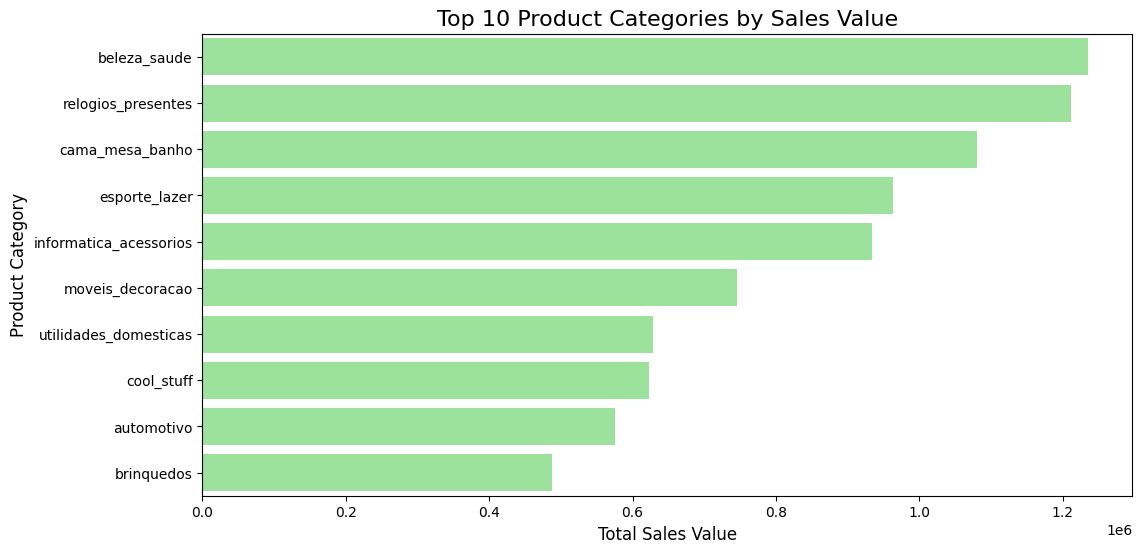

In [141]:
# Ambil 10 kategori teratas berdasarkan total sales value
top_10_category_sales_df = category_sales_df.head(10)

# Plotting the sales contribution by product category
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="total_value", y="product_category_name", data=top_10_category_sales_df, color='lightgreen', ax=ax)
ax.set_title("Top 10 Product Categories by Sales Value", fontsize=16)
ax.set_xlabel("Total Sales Value", fontsize=12)
ax.set_ylabel("Product Category", fontsize=12)
st.pyplot(fig)

##### Bagaimana hubungan antara waktu pengiriman dengan tingkat kepuasan pelanggan?

In [142]:
# Converting shipping date and review date to datetime
all_df['shipping_limit_date'] = pd.to_datetime(all_df['shipping_limit_date'])
all_df['review_creation_date'] = pd.to_datetime(all_df['review_creation_date'])

# Calculating shipping time
all_df['shipping_time'] = (all_df['review_creation_date'] - all_df['shipping_limit_date']).dt.days

# Grouping by shipping time and average review score
shipping_review_df = all_df.groupby('shipping_time').agg({
    'review_score': 'mean'
}).reset_index()

# Filter shipping_time
shipping_review_df = shipping_review_df.query('-50 <= shipping_time <= 50')

shipping_review_df

,shipping_time,review_score
7,-48,1.000000
8,-47,1.000000
9,-43,5.000000
10,-42,5.000000
11,-41,4.200000
...,...,...
96,46,2.142857
97,47,2.333333
98,48,3.846154
99,49,5.000000


In [143]:
# Plotting the relationship
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x="shipping_time", y="review_score", data=shipping_review_df, color='coral', s=50, ax=ax)
sns.lineplot(x="shipping_time", y="review_score", data=shipping_review_df, color='teal', ax=ax)
ax.set_title("Shipping Time vs Customer Satisfaction (Review Score)", fontsize=16)
ax.set_xlabel("Shipping Time (Days)", fontsize=12)
ax.set_ylabel("Average Review Score", fontsize=12)
ax.axhline(y=4, color='grey', linestyle='--', linewidth=1, label='Target Review Score = 4')
ax.legend()
st.pyplot(fig)

2024-12-18 01:30:09.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 01:30:10.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 01:30:10.641 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

##### Apa metode pembayaran yang paling populer, dan bagaimana kaitannya dengan jumlah pesanan dan nilai transaksi?

In [144]:
# Grouping by payment type and aggregating total orders and value
payment_method_df = all_df.groupby('payment_type').agg({
    'order_id': 'nunique',
    'total_value': 'sum'
}).reset_index()

payment_method_df

,payment_type,order_id,total_value
0,boleto,19286,2291897.78
1,credit_card,74618,10469211.28
2,debit_card,1497,171943.35
3,voucher,3698,636131.72


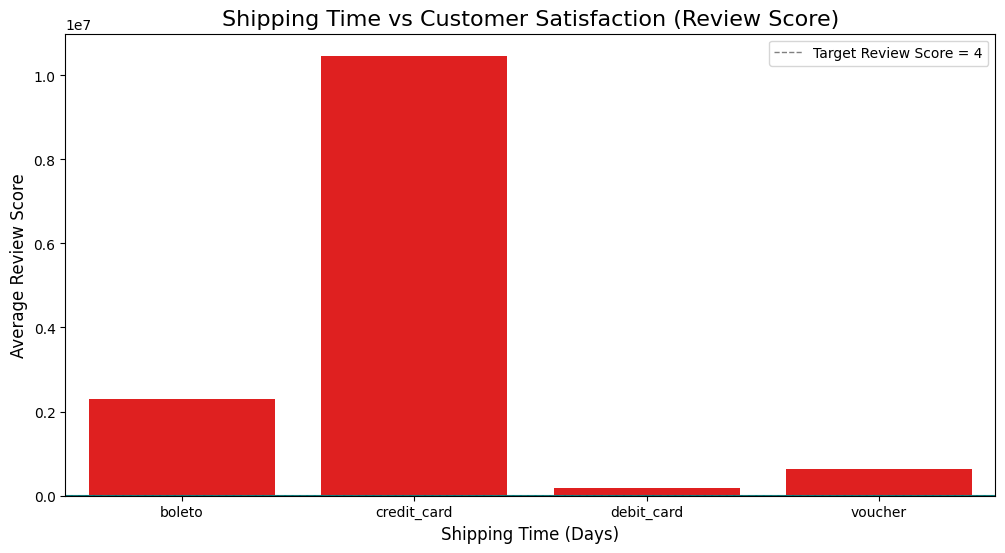

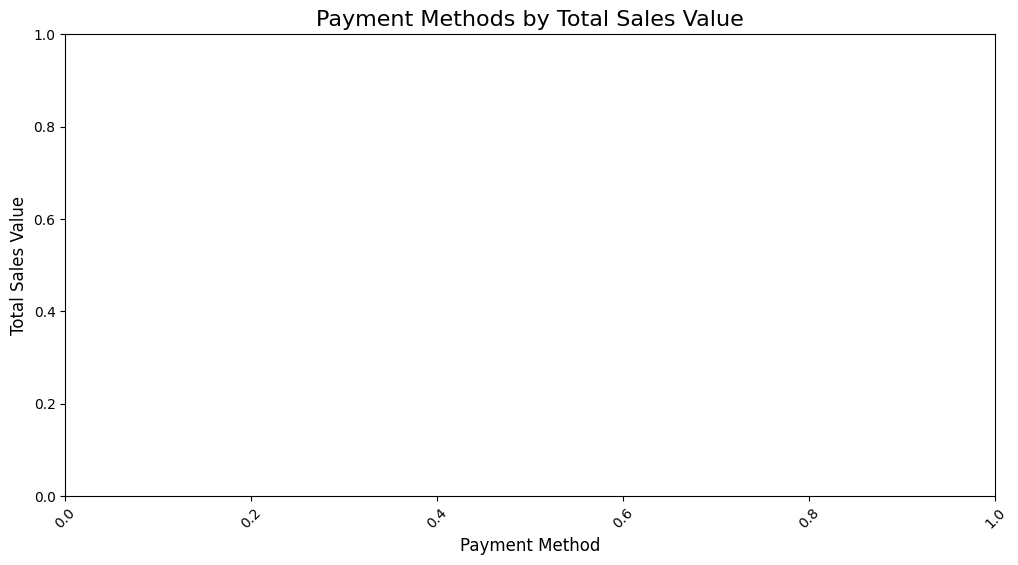

In [145]:
# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x="payment_type", y="total_value", data=payment_method_df, color="red", ax=ax)
plt.title("Payment Methods by Total Sales Value", fontsize=16)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### Kapan waktu optimal untuk promosi berdasarkan pola pembelian pelanggan?

In [146]:
# Convert 'order_purchase_timestamp' to datetime
all_df['order_date'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Extracting order month and day
all_df['order_month'] = all_df['order_date'].dt.month
all_df['order_day'] = all_df['order_date'].dt.day_name()

# Grouping by month and calculating total orders and sales
monthly_sales_df = all_df.groupby('order_month').agg({
    'order_id': 'nunique',
    'total_value': 'sum'
}).reset_index()

monthly_sales_df

,order_month,order_id,total_value
0,1,7896,1080630.06
1,2,8311,1098685.98
2,3,9679,1358053.49
3,4,9040,1323076.95
4,5,10174,1481644.45
5,6,9246,1301330.78
6,7,10079,1381557.82
7,8,10603,1425142.29
8,9,4189,650804.66
9,10,4803,716214.72


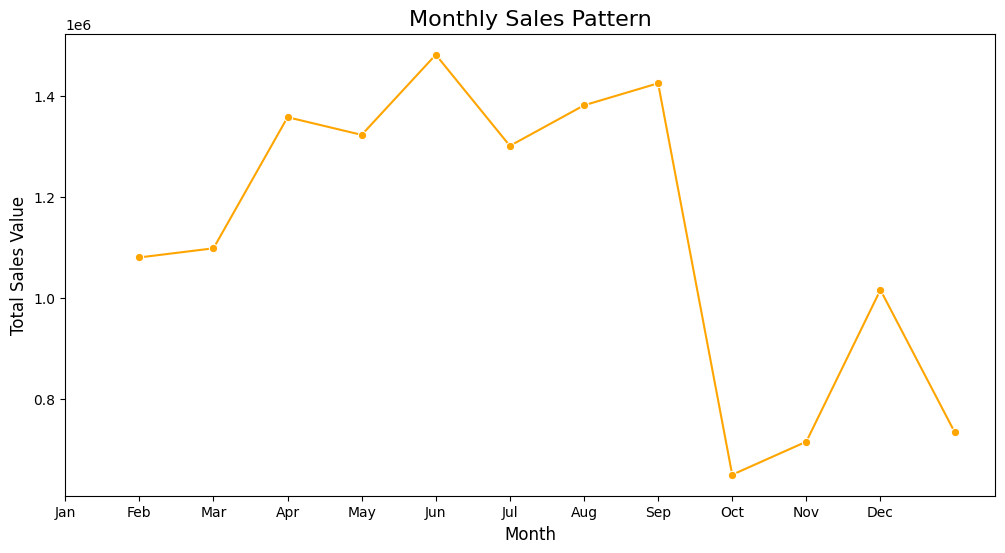

In [147]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x="order_month", y="total_value", data=monthly_sales_df, marker='o', color='orange')
plt.title("Monthly Sales Pattern", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

##### Metode pembayaran mana yang mendorong transaksi dengan nilai tertinggi?

In [148]:
# Sorting the data by total_value and finding top payment methods for high-value transactions
high_value_transactions_df = all_df.sort_values(by='total_value', ascending=False).head(100)

# Grouping by payment type
payment_method_high_value_df = high_value_transactions_df.groupby('payment_type').agg({
    'order_id': 'nunique',
    'total_value': 'sum'
}).reset_index()

payment_method_high_value_df

,payment_type,order_id,total_value
0,boleto,11,27426.41
1,credit_card,82,191418.95
2,debit_card,3,8789.99
3,voucher,2,4948.00


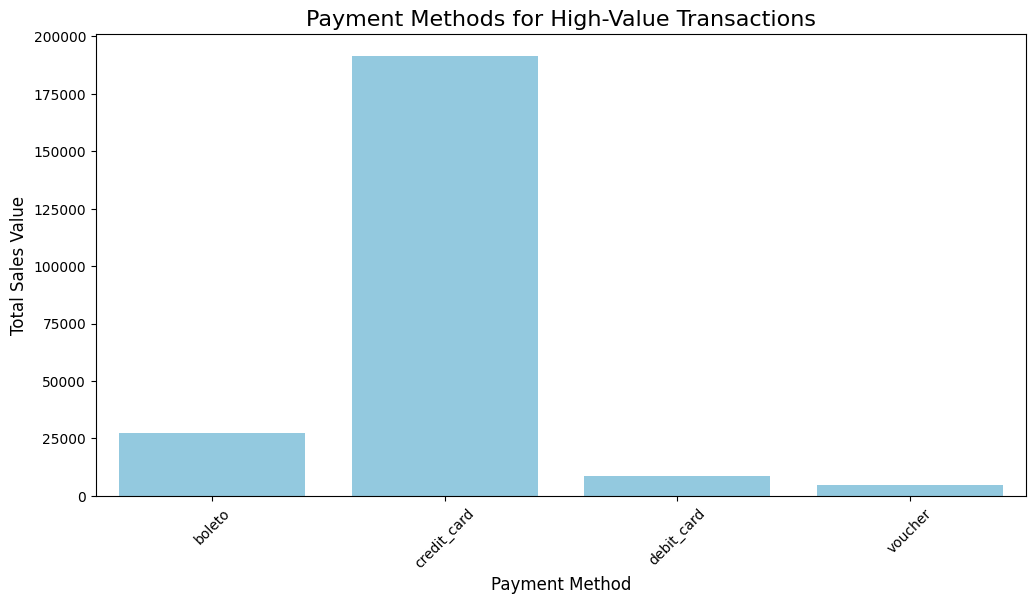

In [149]:
# Plotting with correct color parameter
plt.figure(figsize=(12, 6))
sns.barplot(x="payment_type", y="total_value", data=payment_method_high_value_df, color='skyblue')
plt.title("Payment Methods for High-Value Transactions", fontsize=16)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### Bagaimana efisiensi pengiriman dipengaruhi oleh lokasi geografis pelanggan?

In [150]:
# Pastikan shipping_time sudah dihitung sebelumnya
if 'shipping_time' not in all_df.columns:
    # Konversi kolom menjadi datetime jika belum dilakukan
    all_df['review_creation_date'] = pd.to_datetime(all_df['review_creation_date'], errors='coerce')
    all_df['shipping_limit_date'] = pd.to_datetime(all_df['shipping_limit_date'], errors='coerce')
        
    # Hapus baris dengan nilai NaT
    all_df = all_df.dropna(subset=['review_creation_date', 'shipping_limit_date'])
        
    # Hitung shipping_time
    all_df['shipping_time'] = (all_df['review_creation_date'] - all_df['shipping_limit_date']).dt.days

# Grouping by customer location
shipping_location_df = all_df.groupby('customer_city').agg({
    'shipping_time': 'mean'
}).reset_index()

# Sorting descending by shipping_time
shipping_location_df = shipping_location_df.sort_values(by='shipping_time', ascending=False)

# Ambil 10 kota teratas
top_cities = shipping_location_df.head(10)
top_cities

,customer_city,shipping_time
627,cacimbinhas,59.000000
3468,sao joao do itaperiu,42.000000
1729,itacoatiara,39.000000
2085,livramento,38.000000
488,boca da mata,37.000000
3087,riacho de santo antonio,37.000000
2052,laranjal do jari,36.666667
1862,jacareacanga,36.000000
4061,vitoria do jari,35.000000
2880,placas,34.500000


In [151]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
    
# Plot horizontal barplot
sns.barplot(x="shipping_time", y="customer_city", data=top_cities, ax=ax)
    
# Tambahkan label di ujung bar
for i, value in enumerate(top_cities['shipping_time']):
    ax.text(value + 0.5, i, f"{value:.2f}", va='center', fontsize=10)
ax.set_title("Top 10 Cities with Highest Average Shipping Time", fontsize=16)
ax.set_xlabel("Average Shipping Time (Days)", fontsize=12)
ax.set_ylabel("Customer City", fontsize=12)
st.pyplot(fig)

2024-12-18 01:30:12.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 01:30:13.536 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 01:30:13.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()